In [1]:
%matplotlib inline

import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from model import Model

seed= 7

np.random.seed(7)

import os

Using TensorFlow backend.


In [3]:
model = Model()

In [4]:
train_features, train_labels, train_generator = model.generateData("data/train") #generate train data
test_features, test_labels, test_generator = model.generateData("data/test")     #generate test data

Found 2200 images belonging to 3 classes.


KeyboardInterrupt: 

In [100]:
model.fit(train_features, train_labels, test_features, test_labels,epochs=5)     #fit the model

In [101]:
#analyze classified images

fnames = test_generator.filenames #file names of images 
actual  = test_generator.classes  # actual label for images
label2index = test_generator.class_indices # label to index generator
index2label = dict((v,k) for k,v in label2index.iteritems()) #index to label generator


predictions = model.predict_class(test_features)  # value of last layer of nn
errors = np.where(predictions != actual)[0]  #index of miss classified images

Original label : cats, Predicted: dogs


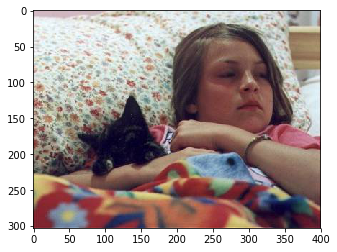

Original label : cats, Predicted: dogs


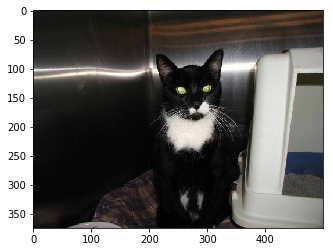

Original label : dogs, Predicted: cats


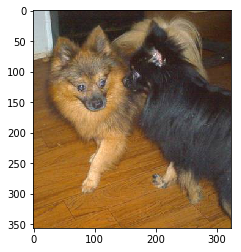

In [102]:
import matplotlib.pyplot as plt

for i in errors:
    load_img(os.path.join("data/test/",fnames[i]))
    plt.imshow(load_img(os.path.join("data/test/",fnames[i])))
    print ("Original label : %s, Predicted: %s")%(index2label[actual[i]],
                                                        index2label[predictions[i]],
                                                        )
    plt.show()